In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [8]:
DATA_IN_PATH = './data_in/'
train_data =pd.read_csv(DATA_IN_PATH + 'ratings_train.csv', delimiter='\t',quoting=3)

In [9]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [12]:
train_length = train_data['document'].astype(str).apply(len)

In [13]:
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

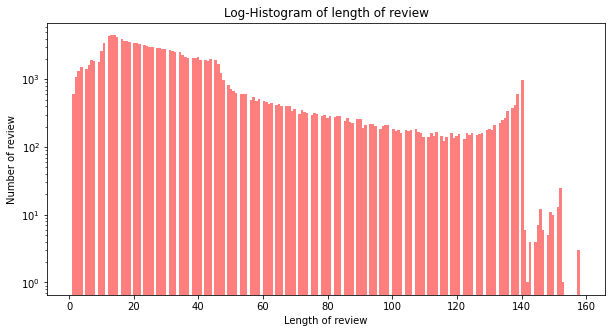

In [14]:
plt.figure(figsize=(10,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r')
plt.yscale('log',nonpositive='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')
plt.show()

In [15]:
print('리뷰 길이 최대값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대값: 158
리뷰 길이 최소값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간값: 27.0
리뷰 길이 1사분위: 16.0
리뷰 길이 3사분위: 42.0


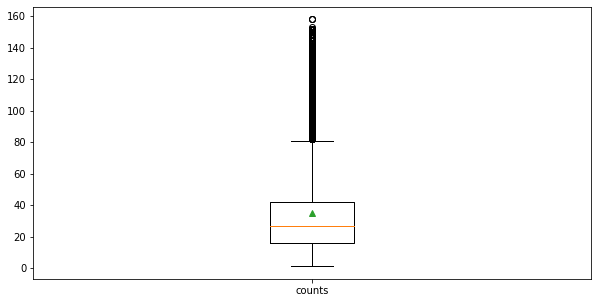

In [16]:
plt.figure(figsize=(10,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)
plt.show()

In [17]:
train_review = [review for review in train_data['document'] if type(review) is str]

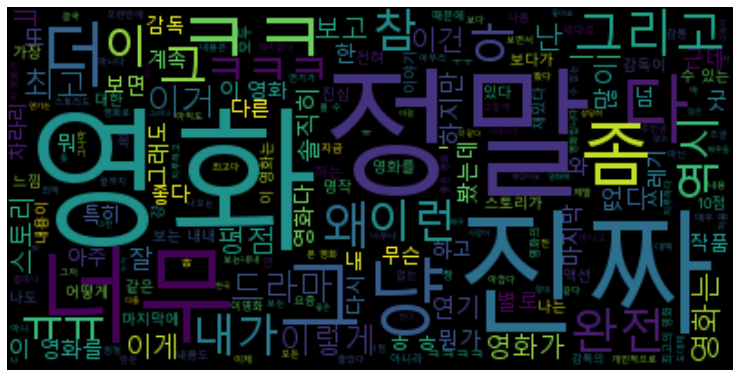

In [19]:
wordcloud = WordCloud(font_path='C:\\WINDOWS\\FONTS\\MALGUN.TTF').generate(' '.join(train_review))
plt.figure(figsize=(13, 10))
plt.imshow(wordcloud, interpolation='bilinear')#픽셀과 픽셀사이의 경계가 되는 픽셀을 부드럽게 하기위해
plt.axis('off')
plt.show()

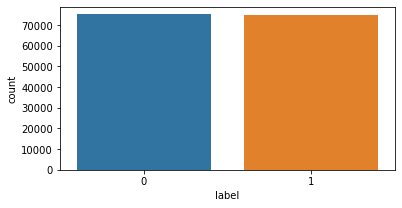

In [21]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(x=train_data['label'])
plt.show()
              

In [22]:
print('긍정 리뷰: {}'. format(train_data['label'].value_counts()[1]))
print('부정 리뷰: {}'. format(train_data['label'].value_counts()[0]))

긍정 리뷰: 74827
부정 리뷰: 75173


In [23]:
#실제 단어수 확인
train_word_counts = train_data['document'].astype(str).apply(lambda x:len(x.split(' ')))


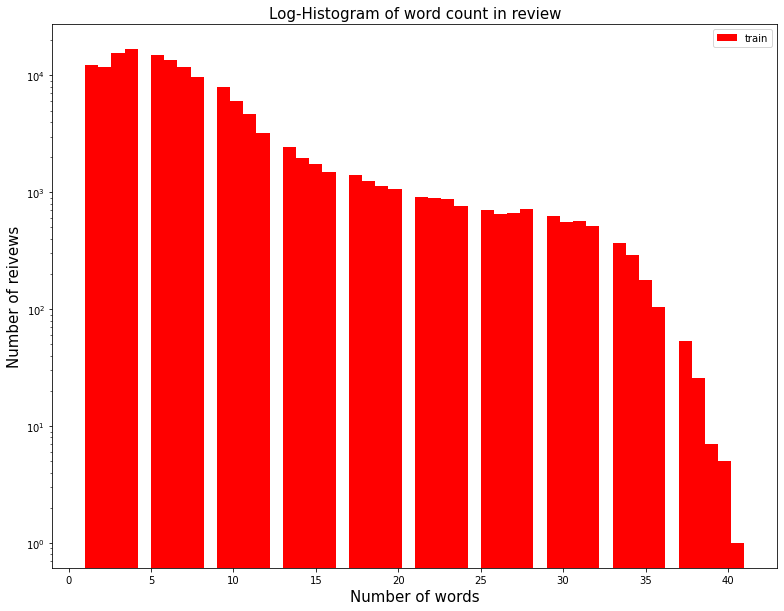

In [25]:
plt.figure(figsize=(13,10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonpositive='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reivews', fontsize=15)
plt.show()

In [27]:
print('리뷰 단어 개수 최대값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수  최소값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수  평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수  표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수  중간값: {}'.format(np.median(train_word_counts)))
print('리뷰 단어 개수  1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수  3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대값: 41
리뷰 단어 개수  최소값: 1
리뷰 단어 개수  평균값: 7.58
리뷰 단어 개수  표준편차: 6.51
리뷰 단어 개수  중간값: 6.0
리뷰 단어 개수  1사분위: 3.0
리뷰 단어 개수  3사분위: 9.0


In [28]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x))
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x))
print('물음표가 있는 리뷰: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 리뷰: {:.2f}%'.format(fullstop * 100))                                         

물음표가 있는 리뷰: 8.25%
마침표가 있는 리뷰: 51.76%


In [29]:
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [30]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [32]:
review_text = re.sub(r'[^가-힣ㄱ-ㅎ ㅏ-ㅣ\s]','',train_data['document'][0])
print(review_text)                                                 

아 더빙 진짜 짜증나네요 목소리


In [33]:
#단어 단위로 토크나이징
okt = Okt()
review_text = okt.morphs(review_text, stem=True)
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [34]:
#직접 불용어 사전 만들기
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한'])
clean_review = [token for token in review_text if not token in stop_words]
print(clean_review)

['더빙', '진짜', '짜증나다', '목소리']


In [35]:
def preprocessing(review, okt, remove_stopwords=False, stop_words=[]):
    review_text = re.sub(r'[^가-힣ㄱ-ㅎ ㅏ-ㅣ\s]','',review)
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        word_review = [token for token in word_review if not token in stop_words]
        
    return word_review

In [36]:
clean_train_review = []
for review in train_data['document']:
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords=True,
                                                stop_words=stop_words))
    else:
        clean_train_review.append([])
        
print(clean_train_review[:4])

[['더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'], ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']]


In [37]:
test_data = pd.read_csv(DATA_IN_PATH + 'ratings_test.csv', delimiter='\t', quoting=3)
from tqdm.notebook import tqdm

clean_test_review = []

for review in test_data['document']:
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords=True,
                                                stop_words=stop_words))
    else:
        clean_test_review.append([])
        
print(clean_test_review[:4])

[['굳다', 'ㅋ'], [], ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'], ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는']]


In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index
#인덱스 벡터로 만든 후 단어사전 생성

In [43]:
print(word_vocab['더빙'])

463


In [44]:
MAX_SEQUENCE_LENGTH = 8

train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
train_labels = np.array(train_data['label'])

test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_labels = np.array(test_data['label'])


In [46]:
DATA_IN_PATH = './data_in/'
TRAIN_INPUT_DATA ='nsmc_train_input.npy'
TRAIN_LABEL_DATA ='nsmc_train_label.npy'
TEST_INPUT_DATA ='nsmc_test_input.npy'
TEST_LABEL_DATA ='nsmc_test_label.npy'
DATA_CONFIGS = 'nsmc_data_configs.json'

data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

import os
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)
    
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA,'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA,'wb'), train_labels)

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA,'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA,'wb'), test_labels)

json.dump(data_configs,open(DATA_IN_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)